# LAr Analysis example

In [1]:
library(rjags)

source("RJagsAnalysis.R")

Loading required package: coda

Linked to JAGS 4.3.0

Loaded modules: basemod,bugs



# Table of content <a class="anchor" id="toc"></a>

1. [Pseudodata generation](#section1)
2. [Fit with RJags](#section2)<br>
    2.1 [Computing the limit](#section2_1)<br>

# Pseudodata Generation <a class="anchor" id="section1"></a>
[Go to TOC](#toc)

In [2]:
genPseudoData(expratio = 1, stringer = '')

./histograms/pseudodata1_.txt saved.


# Fit with RJags <a class="anchor" id="section2"></a>
[Go to TOC](#toc)

In [3]:
# Fit Input
mass     <- "1000" # MeV
process  <- 0   # 0 -> Migdal, 1 -> Bremsstrahlung, 2-> Nuclear Recoil
levelM   <- 123 # n = 1,2,3 (this means fixing f_{val} = 1)
mod      <- "signal"
expratio <- 1
stringer <- ''

# MCMC number of Iterations:
nIter <- 1e+5

In [4]:
chain <- RJagsAnalysis(mass = mass, process = process, levelM = levelM,
                       mod = mod, expratio = expratio, stringer = stringer,
                       nIter = nIter,
                       save_plot = FALSE                       
                      )

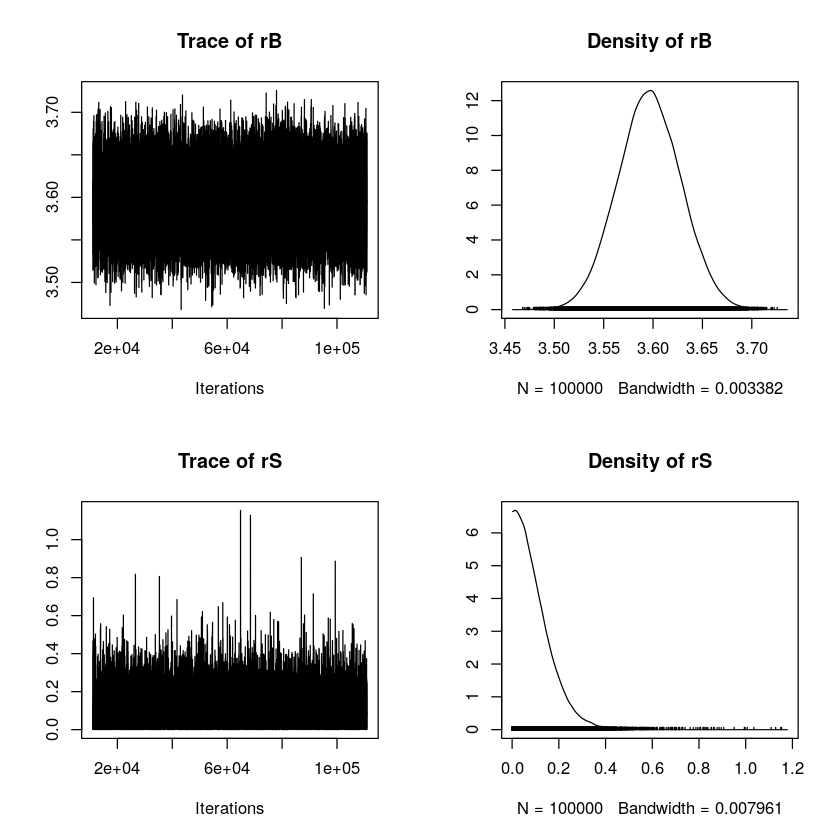

In [5]:
plot(chain)

## Computing the limit <a class="anchor" id="section2_1"></a>
[Go to TOC](#toc)

In [6]:
# Signal template normalization and other fancy stuff

if(process == 0) {
    sigmaNorm <- 1e-37 #cm^2
    if(levelM == 12) {
        strproc <- "Migdal (f_val = 0)"
    } else if(levelM == 123) {
        strproc <- "Midgal (f_val = 1)"
    }
} else if(process == 1) {
    sigmaNorm <- 1e-33 #cm^2
    strproc <- "Bremss"
} else if(process == 2) {
    sigmaNorm <- 1e-41 #cm^2
    strproc <- "NuclearRecoil"
}

In [7]:
# Quantile probability
p <- 0.9

In [8]:
# Quantile computation
chain.df <- as.data.frame(as.mcmc(chain))
q <- quantile(chain.df$rS, p) * sigmaNorm

cat(sprintf("\nMass = %s MeV   -   %s process\n", mass, strproc))
cat(sprintf("\nNumber of MCMC steps: %d\n", nIter))
cat(sprintf("\nsigma_{SI} (90%% C.I.) [cm^2] = %.2e\n", q))


Mass = 1000 MeV   -   Midgal (f_val = 1) process

Number of MCMC steps: 100000

sigma_{SI} (90% C.I.) [cm^2] = 2.04e-38
